# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ptsa.data import readers
import pandas as pd  # optional
import sys
sys.path.append('/data/global/ptsa_plot/')
from ptsa_plot.topo import topoplot
from scipy.stats import kurtosis
ltpFR2_events = np.load('/data/exp_events/ltpFR2_events.npy')
import pickle


In [2]:

events = ltpFR2_events[(ltpFR2_events['type']=='WORD')]
                                
              
              
events = events[(events['artifactMS'] < 0) | (events['artifactMS'] > 1600)].view(np.recarray)

# events_recalled = events[(events['recalled'] == 1)].view(np.recarray)
# events_forgot = events[(events['recalled'] == 0)].view(np.recarray)

In [4]:
# # eegR = readers.EEGReader(events=events_recalled, channels=np.array(right_chans),
# #                         start_time=0.0, end_time=1.6, 
# left_chans = ["012","013","019","020","024","028","029"]
left_chans = ["012","013","019","020","024","028","029"]

eegR = readers.EEGReader(events=events[:5], channels=np.array(left_chans[:2]),
                          start_time=0.0, end_time=1.6, 
                                  buffer_time = 1.0).read().filtered(freq_range=[58.,62.], filt_type="stop")



/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ptsa/data/TimeSeriesX.py:264: UserWarning: The filtered method is not very flexible. Consider using filters in ptsa.data.filters instead.
  warnings.warn("The filtered method is not very flexible. "


In [3]:
# from ptsa.data.filters.MorletWaveletFilter import MorletWaveletFilter as mwf
# fs = np.array([5.0, 7.0, 11.0,18.0, 27.0, 42.0,80.0])

# wfR = mwf(time_series=eegR,
#                              freqs=fs,
#                              output='power',
#                              frequency_dim_pos=0,
#                              width = 6,
#                              verbose=True).filter()

# test = wfR[0]

# eegR.remove_buffer

# wfR = mwf(time_series=eegR,
#                              freqs=fs,
#                              output='power',
#                              frequency_dim_pos=0,
#                              width = 6,
#                              verbose=True).filter()

# test2 = wfR[0]

events

rec.array([ ('LTP093',  1,   1., 'WORD',   1.,      0.,  nan,  24000.,  10., 'BALLOON',    75.,  1.,  0.,  nan,  nan,   1.40967114e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP093/session_0/eeg/eeg.reref/LTP093_2Sep14_1020',  285930,   -1,  -1, -1.        ,  -1.00000000e+00, 1),
 ('LTP093',  1,   1., 'WORD',   2.,      0.,  nan,  24000.,  10., 'MAILBOX',   857.,  1.,  0.,  nan,  nan,   1.40967114e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP093/session_0/eeg/eeg.reref/LTP093_2Sep14_1020',  287178,   -1,  -1, -1.        ,  -1.00000000e+00, 1),
 ('LTP093',  1,   1., 'WORD',   3.,      0.,  nan,  24000.,  10., 'FLOWER',   584.,  1.,  0.,  nan,  nan,   1.40967114e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP093/session_0/eeg/eeg.reref/LTP093_2Sep14_1020',  288443,   -1,  -1, -1.        ,  -1.00000000e+00, 1),
 ...,
 ('LTP330', 24,  24., 'WORD',  22.,  24000.,  11.,  24000.,  13., 'CACTUS',   215.,  0.,  0.,  nan,  nan,   1.47706926e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP330/session_23/eeg/eeg.reref/LTP330_2

500.0

In [29]:
test2.data[:5,0,0,0]

array([ 110918.8828125 ,  105685.75      ,   68030.5       ,
         24063.88867188,   24382.29101562], dtype=float32)

In [9]:
np.nan()

TypeError: 'float' object is not callable

In [3]:
def myFunc(events):
    from ptsa.data import readers
    import numpy as np
    from ptsa.data.filters.MorletWaveletFilter import MorletWaveletFilter as mwf
    left_chans = ["012","013","019","020","024","028","029"]
#     right_chans = ["004","005","111","112","117","118","124"]
#     left_chans = right_chans
    fs = np.array([5.0, 7.0, 11.0,18.0, 27.0, 42.0,80.0])
    

    b = 1.0
    
    eeg = readers.EEGReader(events=events, channels=np.array(left_chans),
                        start_time=0.0, end_time=1.6, 
                                buffer_time = b).read().filtered(freq_range=[58.,62.], filt_type="stop")
    
#     eeg = readers.EEGReader(events=events, channels=np.array(left_chans),
#                         start_time=0.0, end_time=1.6).read().filtered(freq_range=[58.,62.], filt_type="stop")
    
    if (eeg.samplerate.data.max() > 500.0):
        return {'rec': np.full((1, 7), np.nan)[0], 'for': np.full((1, 7), np.nan)[0]}
    
#     w = 2
    w=6
#     w=15
    eegFreq =  mwf(time_series=eeg,
                             freqs=fs,
                             output='power',
                             frequency_dim_pos=0,
                             width = w,
                             verbose=True).filter()
    
    eegFreq = np.log10(eegFreq[0].remove_buffer(b))
#     eegFreq = np.log10(eegFreq[0])
    avgEEG = eegFreq.mean('time')
    zEEG = (avgEEG-avgEEG.mean('events'))/avgEEG.std('events')
    normRecalled = zEEG.sel(events=zEEG.events.values['recalled']==1).mean('events').mean('channels')
    
    normForgot = zEEG.sel(events=zEEG.events.values['recalled']== 0).mean('events').mean('channels') 
      
    return {'rec': normRecalled, 'for': normForgot}

In [4]:
import cluster_helper.cluster
fs = np.array([5.0, 7.0, 11.0,18.0, 27.0, 42.0,80.0])
left_chans = ["012","013","019","020","024","028","029"]


subs = np.unique(events['subject'])


subLevelbyFreqR = np.zeros((len(subs),7))
subLevelbyFreqF = np.zeros((len(subs),7))

for sIdx, s in enumerate(subs):
    print('sub num ' + str(sIdx+1) + " / " + str(len(subs)))
#     sub_events_R = events_recalled[events_recalled['subject'] == s]
#     sub_events_F = events_forgot[events_forgot['subject'] == s]
    
    sub_events = events[events['subject']==s]
    iterable = []
    #subResult = []
    #subResult = myFunc([sub_events_R, sub_events_F])
    for sesh in np.unique(sub_events['session'][:15]):
#         rr = sub_events_R[sub_events_R['session'] == sesh]
#         ff = sub_events_F[sub_events_F['session'] == sesh]
            pass_events = sub_events[sub_events['session']==sesh]
            iterable.append(pass_events)
        #subResult.append(myFunc([rr, ff]))
    
    with cluster_helper.cluster.cluster_view(
        scheduler="sge", queue="all.q", num_jobs=5,
        extra_params= {'resources': 'h_vmem=6G'}, cores_per_job=1) as view:
        subResult = view.map(myFunc, iterable)     
    #subResult = [myFunc(x) for x in iterable]


    byFreqR = {}
    byFreqF = {}
    for f in fs:
        byFreqR[f] = []
        byFreqF[f] = []

    for dic in subResult:

        for j,f in enumerate(fs):

            byFreqR[f].append(dic['rec'].data[j])
            byFreqF[f].append(dic['for'].data[j])


    for num, fr in enumerate(byFreqR):
        subLevelbyFreqR[sIdx, num] = np.nanmean(byFreqR[fr])
        subLevelbyFreqF[sIdx, num] = np.nanmean(byFreqF[fr])
        
        
pickle.dump(subLevelbyFreqR, open( "rec_right_array_bufferless", "wb" ))
pickle.dump(subLevelbyFreqF, open( "for_right_array_bufferless", "wb" ))

sub num 1 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 2 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 3 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 4 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 5 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 6 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 7 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 8 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 9 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 10 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 11 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice


sub num 34 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 35 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 36 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 37 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 38 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 39 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 40 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 41 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 42 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 43 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 44 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.

In [5]:
# import pickle
# sbRload = pickle.load( open( "rec_left_array_data_tr", "rb" ) )
# sbFload = pickle.load( open( "for_left_array_data_tr", "rb" ) )

sbRload = subLevelbyFreqR
sbFload = subLevelbyFreqF
nextStepR = np.delete(sbRload, 32, 0)
nextStepF = np.delete(sbFload, 32, 0)

In [6]:
from scipy.stats import ttest_rel


p_vals = ttest_rel(nextStepR, nextStepF)[1]
sig_fs = fs[np.where(p_vals<.05)]

m = 7
alpha = .05
sorted_pvals = np.sort(p_vals)
arg_sorted_pvals = np.argsort(p_vals)

for i in range(1,m):
    
    if (not(sorted_pvals[i-1] <= alpha* (i)/m)):
        break

threshold = i
print(threshold)

locs = arg_sorted_pvals[:(threshold-1)]
loc_y = np.ones(len(locs))*-.15
locs = fs[locs]
locs

5


array([ 11.,   7.,  18.,  27.])

<IPython.core.display.Javascript object>


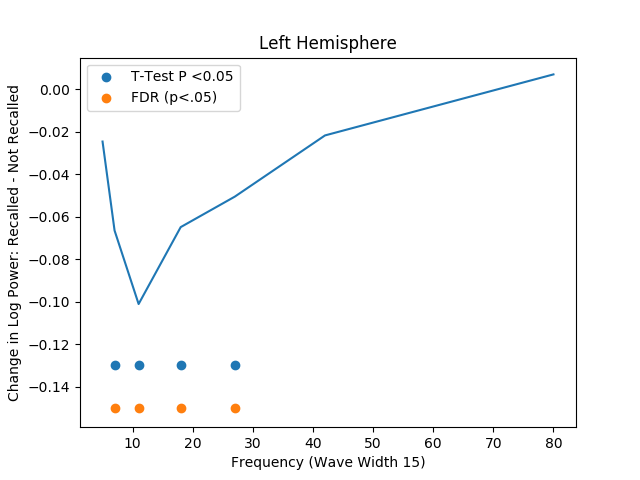

In [7]:
plt.figure()
plt.plot(fs,np.nanmean(sbRload,axis=0) - np.nanmean(sbFload,axis=0))

plt.title('Left Hemisphere')
plt.xlabel('Frequency (Wave Width 15)')
plt.ylabel('Change in Log Power: Recalled - Not Recalled')
plt.scatter(sig_fs, -.13*np.ones(np.shape(sig_fs)), label='T-Test P <0.05')
plt.scatter(locs,loc_y,label="FDR (p<.05)")
plt.legend()
plt.savefig('Left_Array_Figure_No_Buffer')
         

# Part 2

In [10]:
def myFuncPart2(events):
    from ptsa.data import readers
    import numpy as np
    from ptsa.data.filters.MorletWaveletFilter import MorletWaveletFilter as mwf
#     left_chans = ["012","013","019","020","024","028","029"]
    right_chans = ["004","005","111","112","117","118","124"]
    left_chans = right_chans
    fs = np.array([5.0, 7.0, 11.0,18.0, 27.0, 42.0,80.0])
    

    b = 1.0
    
    eeg = readers.EEGReader(events=events, channels=np.array(left_chans),
                        start_time=0.0, end_time=1.6, 
                                buffer_time = b).read().filtered(freq_range=[58.,62.], filt_type="stop")
    
#     eeg = readers.EEGReader(events=events, channels=np.array(left_chans),
#                         start_time=0.0, end_time=1.6).read().filtered(freq_range=[58.,62.], filt_type="stop")
    
    if (eeg.samplerate.data.max() > 500.0):
        return {'rec': np.full((1, 7), np.nan)[0], 'for': np.full((1, 7), np.nan)[0]}
    
#     w = 2
    w=6
#     w=15
    eegFreq =  mwf(time_series=eeg,
                             freqs=fs,
                             output='power',
                             frequency_dim_pos=0,
                             width = w,
                             verbose=True).filter()
    avgEEG = np.log10(eegFreq[0].remove_buffer(b).resampled(20))
#     eegFreq = np.log10(eegFreq[0])
#     avgEEG = np.log10(eegFreq[0].resampled(20))
    zEEG = (avgEEG-avgEEG.mean('events'))/avgEEG.std('events')
    normRecalled = zEEG.sel(events=zEEG.events.values['recalled']==1).mean('events').mean('channels')
    
    normForgot = zEEG.sel(events=zEEG.events.values['recalled']== 0).mean('events').mean('channels') 

#     return avgEEG
    return {'rec': normRecalled, 'for': normForgot}

In [14]:
first_dic = myFuncPart2(events[:10])
# sec_dic = myFuncPart2(events[10:20])

total time wavelet loop:  0.11006617546081543


/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ptsa/data/TimeSeriesX.py:264: UserWarning: The filtered method is not very flexible. Consider using filters in ptsa.data.filters instead.
  warnings.warn("The filtered method is not very flexible. "
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10


In [15]:
(first_dic['rec'])

<xarray.TimeSeriesX (frequency: 7, time: 32)>
array([[-0.037978, -0.030742, -0.001176, ..., -0.106953, -0.093113, -0.062837],
       [ 0.096093,  0.072279,  0.037026, ...,  0.039258,  0.071242,  0.072033],
       [ 0.077184,  0.113428,  0.167874, ..., -0.006589,  0.031361,  0.036052],
       ..., 
       [-0.011474,  0.070698,  0.101064, ...,  0.091616, -0.018507, -0.007217],
       [ 0.017728, -0.022419, -0.050086, ...,  0.067754,  0.022952, -0.039031],
       [ 0.139187,  0.050218,  0.014817, ...,  0.157316,  0.03765 ,  0.033466]])
Coordinates:
  * frequency   (frequency) float64 5.0 7.0 11.0 18.0 27.0 42.0 80.0
  * time        (time) float64 0.0 0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 ...
    samplerate  float64 20.0

In [ ]:
subResult1 = [first_dic,sec_dic, first_dic]
subResult2 = [first_dic, first_dic, first_dic]

In [11]:
import cluster_helper.cluster
fs = np.array([5.0, 7.0, 11.0,18.0, 27.0, 42.0,80.0])
left_chans = ["012","013","019","020","024","028","029"]


subs = np.unique(events['subject'])


subLevelbyFreqR = np.zeros((len(subs),7 ,32))
subLevelbyFreqF = np.zeros((len(subs),7, 32))

for sIdx, s in enumerate(subs):
    print('sub num ' + str(sIdx+1) + " / " + str(len(subs)))
#     sub_events_R = events_recalled[events_recalled['subject'] == s]
#     sub_events_F = events_forgot[events_forgot['subject'] == s]
    
    sub_events = events[events['subject']==s]
    iterable = []
    #subResult = []
    #subResult = myFunc([sub_events_R, sub_events_F])
    for sesh in np.unique(sub_events['session'][:15]):
#         rr = sub_events_R[sub_events_R['session'] == sesh]
#         ff = sub_events_F[sub_events_F['session'] == sesh]
            pass_events = sub_events[sub_events['session']==sesh]
            iterable.append(pass_events)
        #subResult.append(myFunc([rr, ff]))
    
    with cluster_helper.cluster.cluster_view(
        scheduler="sge", queue="all.q", num_jobs=10,
        extra_params= {'resources': 'h_vmem=6G'}, cores_per_job=1) as view:
        subResult = view.map(myFuncPart2, iterable)     
    #subResult = [myFunc(x) for x in iterable]


    byFreqR = {}
    byFreqF = {}
    for f in fs:
        byFreqR[f] = []
        byFreqF[f] = []

    for dic in subResult:

        for j,f in enumerate(fs):

            byFreqR[f].append(dic['rec'].data[j])
            byFreqF[f].append(dic['for'].data[j])


    for num, fr in enumerate(byFreqR):
        subLevelbyFreqR[sIdx, num, :] = np.nanmean(byFreqR[fr], axis=0)
        subLevelbyFreqF[sIdx, num, :] = np.nanmean(byFreqF[fr], axis=0)
        

        
        
        
sbRload = subLevelbyFreqR
sbFload = subLevelbyFreqF
nextStepR = np.mean(np.delete(sbRload, 32, 0), axis=0)
nextStepF = np.mean(np.delete(sbFload, 32, 0), axis=0)



# plt.figure(figsize=(10,5))
# plt.imshow(nextStepR-nextStepF, cmap='bwr', interpolation = 'nearest')
# plt.xticks(range(0,33,4), range(0,1601,200))
# plt.xlabel('Time (ms)')
# plt.yticks(range(0,7), fs)
# plt.ylabel('Frequency (Hz)')
# plt.title('Left Hemisphere (Wave Number 6 - No Buffer)')
# plt.colorbar().set_label('Change in Z-Scored Power \n (Recalled - Forgot)')
# plt.show()
# plt.savefig('Left_NoBuffer_bwr')

sub num 1 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 2 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 3 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 4 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 5 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 6 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 7 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 8 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 9 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 10 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 11 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice


sub num 34 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 35 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 36 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 37 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 38 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 39 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 40 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 41 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 42 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 43 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.
sub num 44 / 56
4 Engines running
Sending a shutdown signal to the controller and engines.

<IPython.core.display.Javascript object>


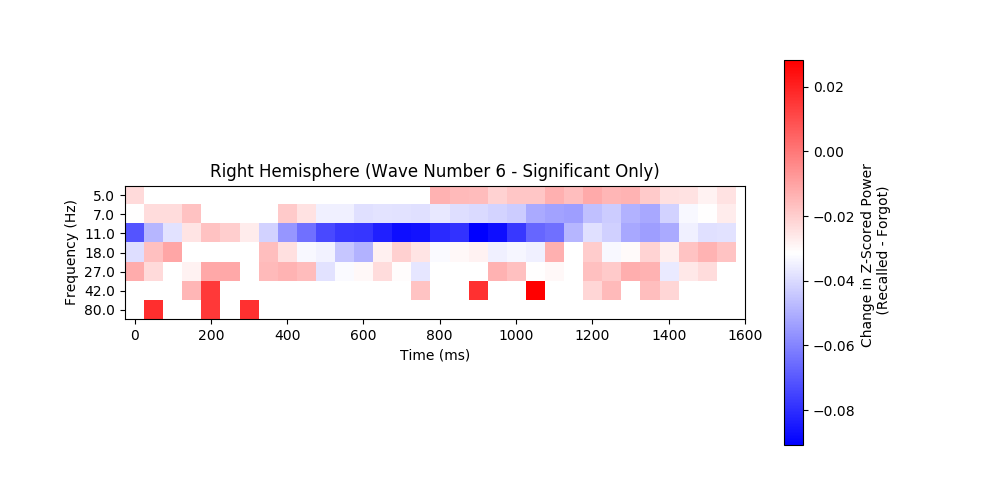

In [30]:
from scipy.stats import ttest_rel
p_vals = ttest_rel(np.delete(sbRload, 32, 0), np.delete(sbFload, 32, 0), axis=0)[1]
plt.figure(figsize=(10,5))
toPlot = nextStepR-nextStepF
toPlot[p_vals > .43] = np.nan;
plt.imshow(toPlot, cmap='bwr')
plt.xticks(range(0,33,4), range(0,1601,200))
plt.xlabel('Time (ms)')
plt.yticks(range(0,7), fs)
plt.ylabel('Frequency (Hz)')
plt.title('Right Hemisphere (Wave Number 6 - Significant Only)')
plt.colorbar().set_label('Change in Z-Scored Power \n (Recalled - Forgot)')
plt.show()
plt.savefig('Right_Sig_bwr')

In [20]:
ttest_rel(sbRload, sbFload, axis=0)

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_relResult(statistic=array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan, 

In [37]:
np.shape(byFreqR[5])

(1, 32)

In [11]:
sbRload = subLevelbyFreqR
sbFload = subLevelbyFreqF
nextStepR = np.mean(np.delete(sbRload, 32, 0), axis=0)
nextStepF = np.mean(np.delete(sbFload, 32, 0), axis=0)
np.shape(nextStepR)

(7, 32)

<IPython.core.display.Javascript object>


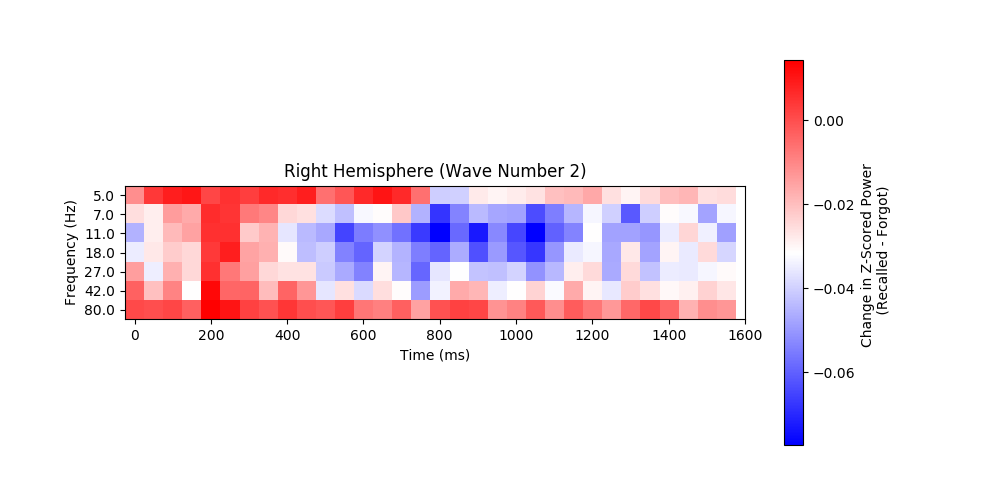

In [12]:
plt.figure(figsize=(10,5))
plt.imshow(nextStepR-nextStepF, cmap='bwr', interpolation = 'nearest')
plt.xticks(range(0,33,4), range(0,1601,200))
plt.xlabel('Time (ms)')
plt.yticks(range(0,7), fs)
plt.ylabel('Frequency (Hz)')
plt.title('Right Hemisphere (Wave Number 2)')
plt.colorbar().set_label('Change in Z-Scored Power \n (Recalled - Forgot)')
plt.show()
plt.savefig('Right_Wave2_bwr')

In [76]:
(first_dic['rec'].time.data)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55])

In [94]:
range(0,33,2)

range(0, 33, 2)